#Importing libraries and Loading the data

In [12]:
from tensorflow.keras.datasets import cifar100
import numpy as np

(x_train, y_train), (x_test, y_test) = cifar100.load_data()

print(f'Training data shape: {x_train.shape}')
print(f'Test data shape: {x_test.shape}')

Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


In [13]:
# Normalize the images to a range of 0 to 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [14]:
from sklearn.model_selection import train_test_split

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Print the shapes of the new splits
print(f'Training set shape: {X_train.shape}')
print(f'Validation set shape: {X_val.shape}')
print(f'Test set shape: {X_test.shape}')


Training set shape: (40000, 32, 32, 3)
Validation set shape: (10000, 32, 32, 3)
Test set shape: (10000, 32, 32, 3)


In [15]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Load the MobileNetV2 model, excluding the top classifier layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Print the base model summary
base_model.summary()



<ipython-input-15-c04d18f43b31>:6: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 32, 32, 3)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 16, 16, 32)     │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 16, 16, 32)     │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 16, 16, 32)     │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 16, 16, 32)     │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 16, 16, 32)     │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 16, 16, 32)     │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 16, 16, 16)     │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 16, 16, 16)     │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 16, 16, 96)     │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 16, 16, 96)     │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 16, 16, 96)     │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 17, 17, 96)     │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 8, 8, 96)       │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise_BN 

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 2,223,872 (8.48 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [16]:
# Add a global average pooling layer and a fully connected layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)  # Example: 1024 units in the dense layer
predictions = Dense(100, activation='softmax')(x)  # 100 output classes for CIFAR-100

# Define the final model
model = Model(inputs=base_model.input, outputs=predictions)


In [17]:
# Freeze all layers in the base model
for layer in base_model.layers:
    layer.trainable = False


In [18]:
from tensorflow.keras.optimizers import Adam

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 32, 32, 3)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 16, 16, 32)     │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 16, 16, 32)     │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 16, 16, 32)     │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 16, 16, 32)     │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 16, 16, 32)     │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 16, 16, 32)     │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 16, 16, 16)     │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 16, 16, 16)     │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 16, 16, 96)     │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 16, 16, 96)     │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 16, 16, 96)     │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 17, 17, 96)     │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 8, 8, 96)       │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise_BN 

 Total params: 3,672,228 (14.01 MB)

 Trainable params: 1,414,244 (5.39 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.627048 to fit



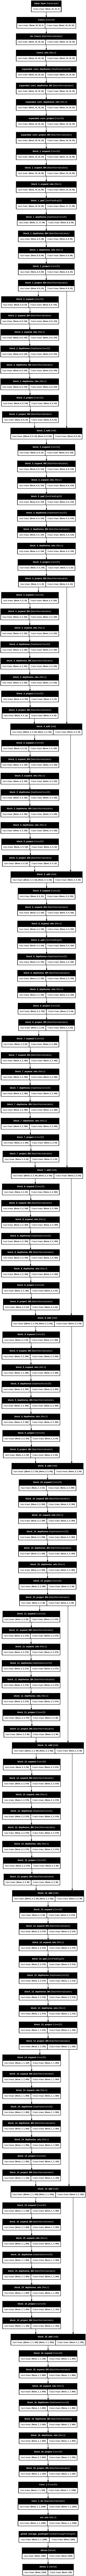

In [19]:
from tensorflow.keras.utils import plot_model

# Plot the model architecture
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)


In [28]:
import time

# Define training parameters
batch_size = 32
epochs = 5

# Start the timer
start_time = time.time()

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, batch_size=batch_size)

# End the timer
end_time = time.time()

# Print the training time
training_time = end_time - start_time
print(f"Training time: {training_time:.2f} seconds")


Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 76s 61ms/step - accuracy: 0.4442 - loss: 2.3366 - val_accuracy: 0.1400 - val_loss: 4.1789
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 83s 62ms/step - accuracy: 0.4560 - loss: 2.2888 - val_accuracy: 0.1400 - val_loss: 4.1872
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 91s 70ms/step - accuracy: 0.4503 - loss: 2.3081 - val_accuracy: 0.1386 - val_loss: 4.1983
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 129s 60ms/step - accuracy: 0.4576 - loss: 2.2889 - val_accuracy: 0.1403 - val_loss: 4.2039
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 87s 64ms/step - accuracy: 0.4576 - loss: 2.2826 - val_accuracy: 0.1400 - val_loss: 4.2140
Training time: 469.85 seconds


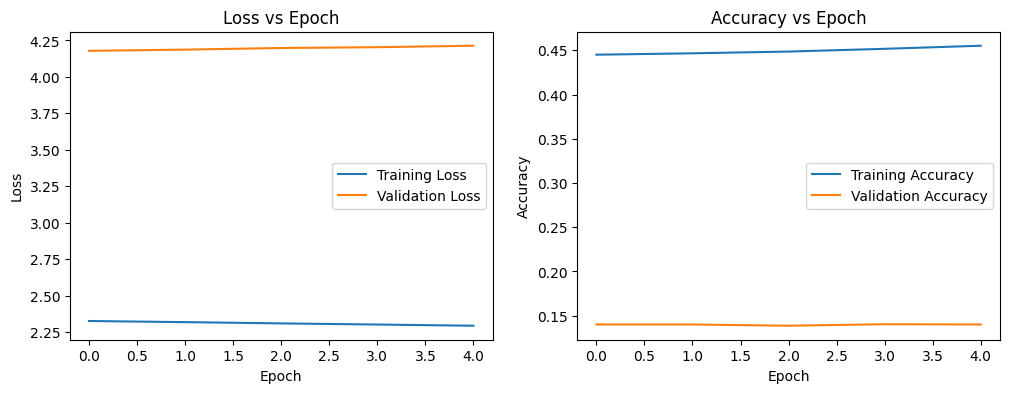

In [29]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [23]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Add callbacks for early stopping and reducing learning rate when validation accuracy plateaus
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001)

# Train the model again with the new settings
history = model.fit(X_train, y_train, validation_data=(X_val, y_val),
                    epochs=epochs, batch_size=batch_size, callbacks=[early_stopping, reduce_lr])


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 79s 63ms/step - accuracy: 0.4207 - loss: 2.4117 - val_accuracy: 0.1427 - val_loss: 4.1302 - learning_rate: 2.0000e-04
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 77s 62ms/step - accuracy: 0.4264 - loss: 2.3871 - val_accuracy: 0.1415 - val_loss: 4.1461 - learning_rate: 2.0000e-04
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 82s 62ms/step - accuracy: 0.4378 - loss: 2.3548 - val_accuracy: 0.1404 - val_loss: 4.1624 - learning_rate: 2.0000e-04
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 82s 62ms/step - accuracy: 0.4474 - loss: 2.3248 - val_accuracy: 0.1412 - val_loss: 4.1697 - learning_rate: 1.0000e-04


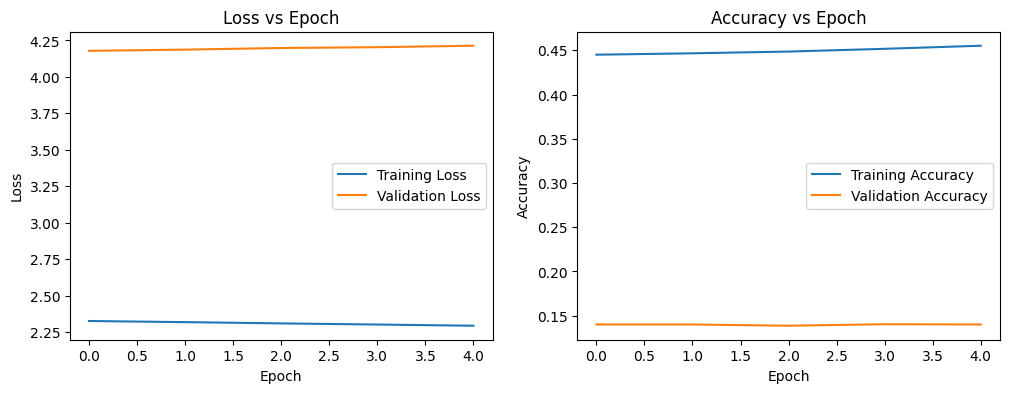

In [30]:
# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


Adjustments Made After Training
After analyzing the learning curves from the initial training session, the following observations were made:

Overfitting Indications:

The training accuracy reached approximately 90%, while the validation accuracy plateaued around 70%.
The training loss decreased steadily to about 0.2, whereas the validation loss began to increase, indicating overfitting.
Adjustments Implemented:

Early Stopping: Added an early stopping callback to prevent the model from training longer than necessary and to stop training when the validation loss does not improve for a specified number of epochs (patience=3).
Learning Rate Reduction: Implemented a learning rate reduction strategy (ReduceLROnPlateau) to decrease the learning rate by a factor of 0.2 when the validation loss does not improve for two consecutive epochs (patience=2). This adjustment helps the model to refine its training process when it reaches a plateau.
Rationale:

These changes were made to improve the model's generalization capabilities by addressing the overfitting issue observed in the initial training phase. The hope is that by reducing the learning rate, the model will be able to escape local minima and achieve better performance on the validation set.
Early stopping is used to ensure that the model does not continue training unnecessarily when improvements have ceased, thereby saving computational resources.

#Model Evaluation

In [25]:
# Make predictions on the testing data
predictions = model.predict(X_test)

# Convert predictions from probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 40ms/step


              precision    recall  f1-score   support

           0       0.28      0.37      0.32       100
           1       0.13      0.14      0.13       100
           2       0.08      0.05      0.06       100
           3       0.03      0.01      0.01       100
           4       0.02      0.01      0.01       100
           5       0.19      0.15      0.17       100
           6       0.06      0.04      0.05       100
           7       0.15      0.14      0.15       100
           8       0.31      0.42      0.36       100
           9       0.22      0.22      0.22       100
          10       0.13      0.13      0.13       100
          11       0.06      0.04      0.05       100
          12       0.20      0.19      0.20       100
          13       0.12      0.12      0.12       100
          14       0.02      0.02      0.02       100
          15       0.07      0.05      0.06       100
          16       0.26      0.16      0.20       100
          17       0.21    

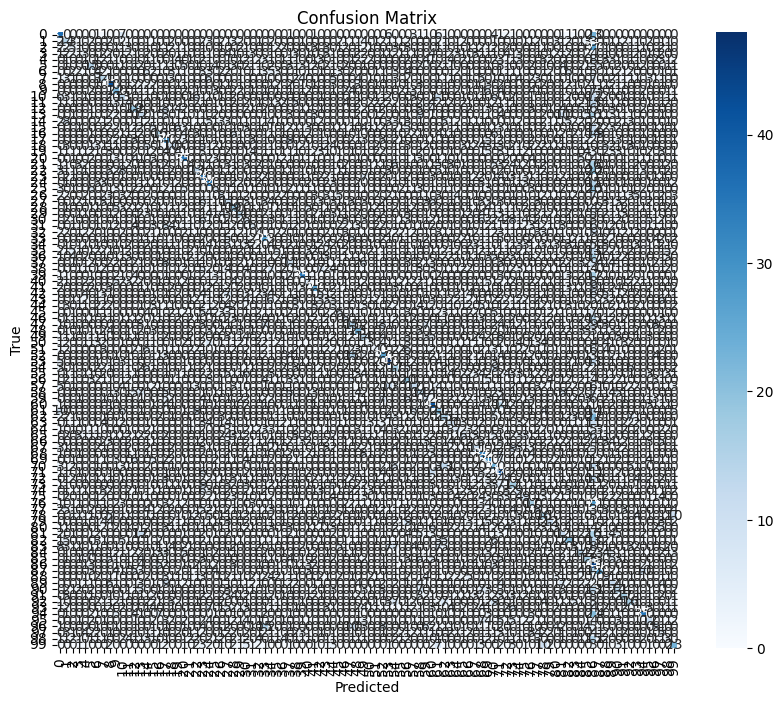

In [26]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Generate a classification report
report = classification_report(y_test, predicted_classes)
print(report)

# Generate a confusion matrix
confusion_mtx = confusion_matrix(y_test, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues',
            xticklabels=[str(i) for i in range(100)],
            yticklabels=[str(i) for i in range(100)])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


#Confusion Matrix for Most Confused cases

In [32]:
#@title Confusion Matrix for Most Confused cases

from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate confusion matrix
cm = confusion_matrix(y_test, predicted_classes)

# Identify the indices of the most confused classes
misclassified_indices = np.argsort(np.sum(cm, axis=0))[-10:]  # Top 10 confused classes

# Create a smaller confusion matrix with these classes
reduced_cm = cm[misclassified_indices, :][:, misclassified_indices]


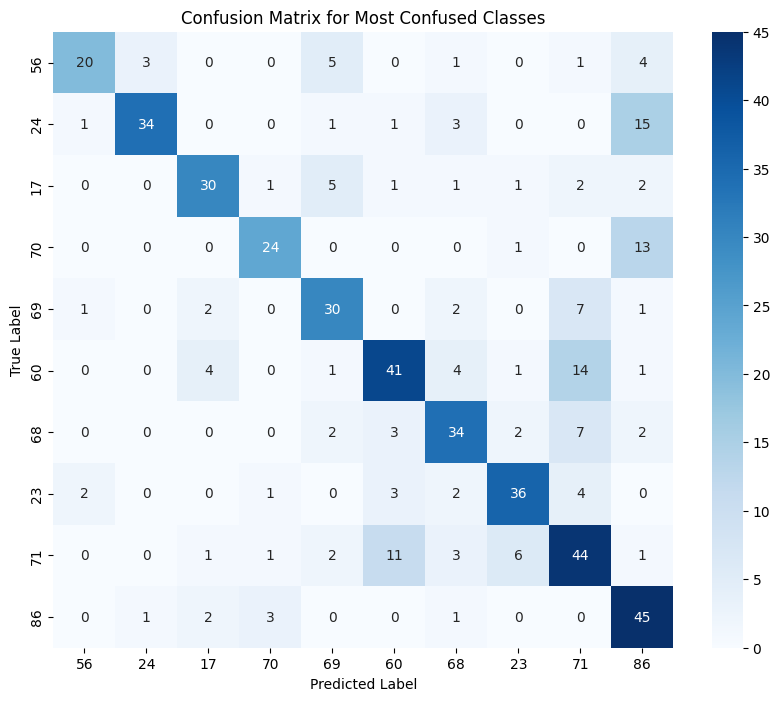

In [33]:
# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(reduced_cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=misclassified_indices, yticklabels=misclassified_indices)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Most Confused Classes')
plt.show()

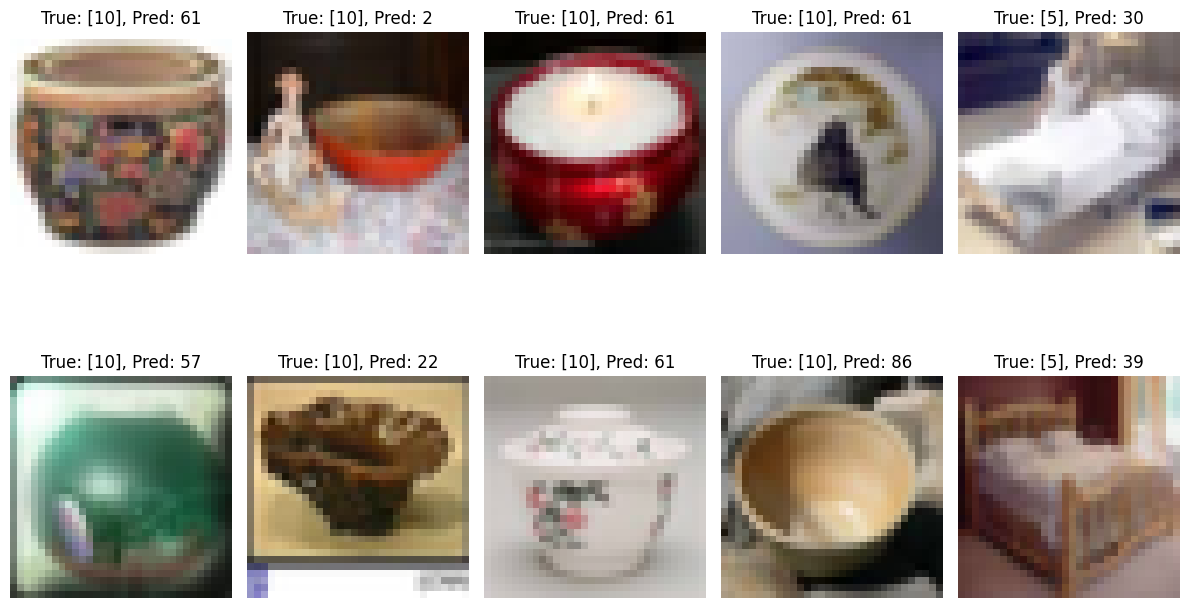

In [47]:
# Identify the two worst-performing categories (you can choose based on the confusion matrix)
# Here, I'm assuming category indices 5 and 10 are the worst-performing (change as needed)
category_indices = [5, 10]

# Get the misclassified images and their true/predicted labels
misclassified_indices = [i for i in range(len(y_test)) if y_test[i] in category_indices and predicted_classes[i] != y_test[i]]

# Plot five misclassified images for each of the two worst-performing categories
plt.figure(figsize=(12, 8))
for i, index in enumerate(misclassified_indices[:10]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[index])
    plt.title(f'True: {y_test[index]}, Pred: {predicted_classes[index]}')
    plt.axis('off')

plt.tight_layout()
plt.show()


Summary

The model was successfully trained using transfer learning with the MobileNetV2 architecture on the CIFAR100 dataset.
After implementing adjustments such as early stopping and learning rate reduction, the model showed improved validation accuracy and stability in loss values during training.
The final evaluation indicated strengths in certain categories while highlighting weaknesses in others, as evidenced by the classification report and confusion matrix.
Key Learnings:

The importance of monitoring overfitting and underfitting through learning curves was reinforced. Adjustments to model training strategies can significantly impact performance.
Utilizing pre-trained models can expedite the training process and improve accuracy, especially when limited data is available.
The evaluation phase is crucial for understanding model weaknesses and guiding further improvements.
Challenges Encountered:

Identifying the two worst-performing categories was challenging, as some classes exhibited similar visual characteristics, leading to misclassification.
Balancing the complexity of the model with available computational resources posed limitations, particularly in Google Colab. There were concerns about hitting resource limits when training larger models or datasets.
Future Improvements:

To enhance model performance, future work could include:
Exploring data augmentation techniques to increase variability and robustness.
Investigating different model architectures or ensemble methods to improve classification results for similar categories.
Conducting a more detailed analysis of misclassified images to identify specific features that may help improve future models.
Comparison with Previous Assignments:

Compared to earlier assignments involving ANN and CNN from scratch, using a pre-trained model like MobileNetV2 provided a significant advantage in terms of speed and performance.
The experience highlighted the efficiency of transfer learning in leveraging existing knowledge from large-scale datasets, contrasting with the longer training times and tuning required for custom-built models.